In [1]:
import pyteomics
import lxml
from pyteomics import mzml, mass
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib import pyplot
import matplotlib
import seaborn as sns
import re
import statistics

# proteome quantification starts here

In [2]:
df_pro=pd.read_csv(r'D:\\csodiaq\\common_proteins.csv')
dfdf_pro=pd.read_csv(r'D:\\csodiaq2\\common_proteins.csv')


In [3]:
df_pro.set_index('Unnamed: 0',inplace=True)
dfdf_pro.set_index('Unnamed: 0',inplace=True)

In [4]:
df_pro=df_pro.drop(columns=['mean','std'])
dfdf_pro=dfdf_pro.drop(columns=['mean','std'])

In [5]:
df_pro

,:/yuming/2023/20230312/quantification/mzxml/MIX_1_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_1_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_1_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_3.mzXML
Unnamed: 0,,,,,,,,,,,,,,,
1/sp|Q9Y230|RUVB2_HUMAN,6.011881e+05,5.714233e+05,4.927962e+05,3.231544e+05,3.383617e+05,2.784492e+05,180588.269165,169206.200012,173619.442169,108784.023499,108382.389587,105792.670715,69327.757080,75817.779114,67639.437714
3/sp|Q9NZI8|IF2B1_HUMAN/sp|Q9Y6M1|IF2B2_HUMAN/sp|O00425|IF2B3_HUMAN,2.013222e+05,2.015020e+05,1.898653e+05,1.360700e+05,1.216945e+05,1.231025e+05,77475.209045,84547.566772,91246.841614,43319.675934,38048.540741,41634.398193,31768.119324,23009.265625,22786.685944
1/sp|P62753|RS6_HUMAN,7.943800e+05,9.106226e+05,8.851556e+05,5.989446e+05,5.726819e+05,5.463822e+05,323060.567688,372805.509735,283488.891510,199965.244446,165017.688904,187762.429626,117555.096222,111038.592010,125880.295959
3/sp|Q9BVA1|TBB2B_HUMAN/sp|Q13885|TBB2A_HUMAN/sp|P68371|TBB4B_HUMAN,2.566179e+05,2.724990e+05,2.622487e+05,1.570673e+05,1.405162e+05,1.448885e+05,97703.741943,84181.561493,83359.744965,51129.048401,53835.992218,47620.060822,31450.563263,26503.196259,28226.371674
1/sp|P30046|DOPD_HUMAN,1.268537e+05,2.014911e+05,1.464638e+05,9.547930e+04,9.273472e+04,9.754567e+04,57631.611572,61772.843933,63864.940552,31261.175293,30489.248566,33280.937408,17843.652649,21504.108246,25165.313446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/sp|Q16576|RBBP7_HUMAN/sp|Q09028|RBBP4_HUMAN,7.172934e+04,7.907927e+04,7.419796e+04,6.018204e+04,5.364874e+04,5.139755e+04,31968.360046,33453.094910,32868.738312,19335.345215,20881.090027,19244.422974,14337.946838,13954.575104,13998.226196
1/sp|Q15185|TEBP_HUMAN,4.981670e+05,4.766226e+05,4.444825e+05,2.941104e+05,2.608264e+05,2.839396e+05,165327.095276,167876.670837,158197.302368,86947.074219,87452.933868,91434.870087,50262.118988,49950.104736,49480.763062
1/sp|P61247|RS3A_HUMAN,1.250431e+06,1.211356e+06,1.153114e+06,5.748591e+05,5.367209e+05,5.498852e+05,328692.792664,327768.882324,339998.534149,199776.938660,183821.671539,208722.616943,118201.300934,118359.862152,127692.520447


In [6]:
# calculate cv of targeted m/z 

cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [7]:
df=df_pro

PRO1=df.iloc[:,:3].T
PRO2=df.iloc[:,3:6].T
PRO3=df.iloc[:,6:9].T
PRO4=df.iloc[:,9:12].T
PRO5=df.iloc[:,12:15].T


In [8]:
newdf={'PRO1':PRO1.apply(cv).tolist(),
    'PRO2':PRO2.apply(cv).tolist(),
    'PRO3':PRO3.apply(cv).tolist(),
    'PRO4':PRO4.apply(cv).tolist(),
    'PRO5':PRO5.apply(cv).tolist()}

In [9]:
uk=pd.DataFrame.from_dict(newdf, orient='index')
um=uk.transpose()

In [10]:
alli=[item for sublist in um.values.tolist() for item in sublist]

goodi=[item for item in alli if item<20] 

len(goodi)/len(alli)

0.9055855855855856

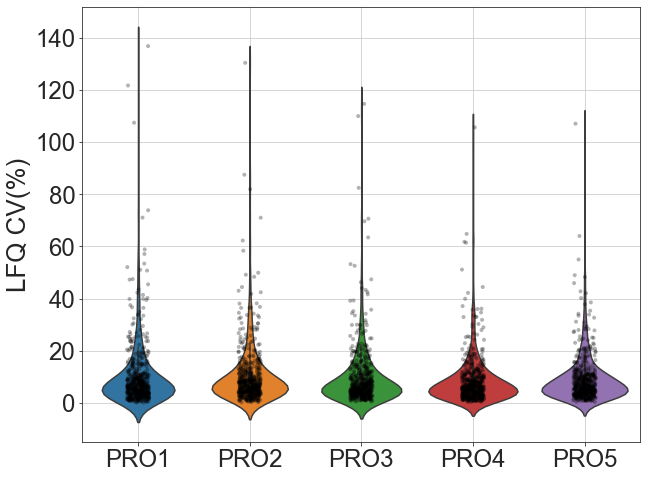

In [11]:
matplotlib.rcParams['font.family'] = "Arial"
plt.figure(figsize=(10, 8))
sns.set_style("ticks")
sns.violinplot(data=um)
sns.stripplot(data=um, jitter=True,alpha=0.3,size=4, color="black")
plt.ylabel('LFQ CV(%)', fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.savefig('D:\\project7_SMAD\\figure2\\pro_quan_CVs.svg', dpi=800,bbox_inches = 'tight')
# Show the plot
plt.show()

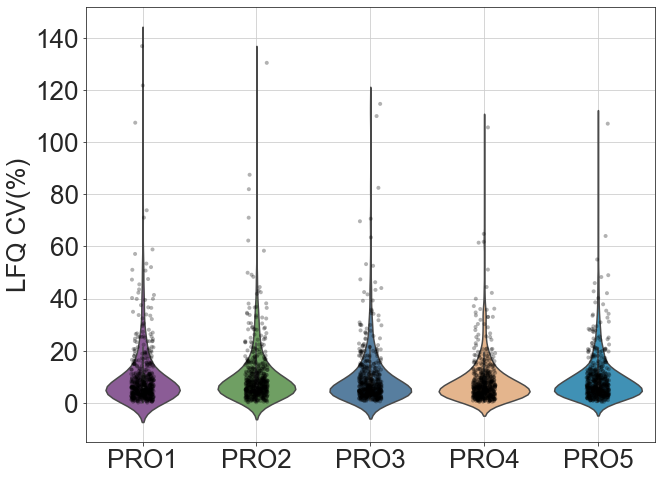

In [50]:
matplotlib.rcParams['font.family'] = "Arial"
plt.figure(figsize=(10.2, 8))
sns.set_style("ticks")
# Define a custom color palette
custom_palette = ['#9152A0', '#69A959', '#4B7FAB','#F3B47E', '#2D99C8']

#sns.set_palette(custom_palette)

sns.violinplot(data=um,palette=custom_palette)
sns.stripplot(data=um, jitter=True,alpha=0.3,size=4, color="black")
plt.ylabel('LFQ CV(%)', fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.grid()
plt.savefig('D:\\project7_SMAD\\figure2\\quantification assessment\\pro_quan_CVs.svg', dpi=800,bbox_inches = 'tight')
# Show the plot
plt.show()

In [23]:
df_pro10=np.log10(df_pro)
df_pro10

,:/yuming/2023/20230312/quantification/mzxml/MIX_1_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_1_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_1_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_3.mzXML
Unnamed: 0,,,,,,,,,,,,,,,
1/sp|Q9Y230|RUVB2_HUMAN,5.779010,5.756958,5.692667,5.509410,5.529381,5.444746,5.256690,5.228416,5.239598,5.036565,5.034959,5.024456,4.840907,4.879771,4.830200
3/sp|Q9NZI8|IF2B1_HUMAN/sp|Q9Y6M1|IF2B2_HUMAN/sp|O00425|IF2B3_HUMAN,5.303892,5.304279,5.278446,5.133762,5.085271,5.090267,4.889163,4.927101,4.960218,4.636685,4.580338,4.619452,4.501992,4.361903,4.357681
1/sp|P62753|RS6_HUMAN,5.900028,5.959338,5.947020,5.777387,5.757913,5.737497,5.509284,5.571482,5.452536,5.300955,5.217531,5.273609,5.070241,5.045474,5.099958
3/sp|Q9BVA1|TBB2B_HUMAN/sp|Q13885|TBB2A_HUMAN/sp|P68371|TBB4B_HUMAN,5.409287,5.435365,5.418713,5.196086,5.147726,5.161034,4.989911,4.925217,4.920956,4.708668,4.731073,4.677790,4.497628,4.423298,4.450655
1/sp|P30046|DOPD_HUMAN,5.103303,5.304256,5.165730,4.979909,4.967242,4.989208,4.760661,4.790798,4.805263,4.495005,4.484147,4.522196,4.251484,4.332521,4.400802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/sp|Q16576|RBBP7_HUMAN/sp|Q09028|RBBP4_HUMAN,4.855697,4.898063,4.870392,4.779467,4.729560,4.710942,4.504720,4.524436,4.516783,4.286352,4.319753,4.284305,4.156487,4.144717,4.146073
1/sp|Q15185|TEBP_HUMAN,5.697375,5.678175,5.647855,5.468510,5.416352,5.453226,5.218344,5.224990,5.199199,4.939255,4.941774,4.961112,4.701241,4.698536,4.694436
1/sp|P61247|RS3A_HUMAN,6.097060,6.083272,6.061872,5.759561,5.729748,5.740272,5.516790,5.515568,5.531477,5.300545,5.264397,5.319570,5.072622,5.073204,5.106165


In [24]:
df_pro2=np.log2(df_pro)
df_pro2

,:/yuming/2023/20230312/quantification/mzxml/MIX_1_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_1_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_1_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_3.mzXML
Unnamed: 0,,,,,,,,,,,,,,,
1/sp|Q9Y230|RUVB2_HUMAN,19.197457,19.124200,18.910632,18.301864,18.368207,18.087055,17.462345,17.368423,17.405569,16.731107,16.725771,16.690880,16.081145,16.210249,16.045577
3/sp|Q9NZI8|IF2B1_HUMAN/sp|Q9Y6M1|IF2B2_HUMAN/sp|O00425|IF2B3_HUMAN,17.619147,17.620435,17.534617,17.053990,16.892904,16.909501,16.241447,16.367476,16.477487,15.402735,15.215554,15.345488,14.955292,14.489927,14.475903
1/sp|P62753|RS6_HUMAN,19.599470,19.796494,19.755572,19.192063,19.127374,19.059551,18.301445,18.508064,18.112933,17.609390,17.332261,17.518549,16.842978,16.760702,16.941693
3/sp|Q9BVA1|TBB2B_HUMAN/sp|Q13885|TBB2A_HUMAN/sp|P68371|TBB4B_HUMAN,17.969262,18.055892,18.000576,17.261023,17.100377,17.144584,16.576126,16.361217,16.347063,15.641856,15.716283,15.539282,14.940798,14.693879,14.784756
1/sp|P30046|DOPD_HUMAN,16.952806,17.620356,17.160184,16.542900,16.500822,16.573790,15.814573,15.914685,15.962737,14.932084,14.896013,15.022408,14.123123,14.392325,14.619149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/sp|Q16576|RBBP7_HUMAN/sp|Q09028|RBBP4_HUMAN,16.130276,16.271012,16.179092,15.877046,15.711257,15.649412,14.964357,15.029852,15.004428,14.238953,14.349909,14.232153,13.807551,13.768451,13.772956
1/sp|Q15185|TEBP_HUMAN,18.926270,18.862488,18.761767,18.165998,17.992731,18.115224,17.334964,17.357042,17.271365,16.407850,16.416219,16.480457,15.617184,15.608200,15.594580
1/sp|P61247|RS3A_HUMAN,20.253994,20.208191,20.137103,19.132849,19.033813,19.068771,18.326380,18.322319,18.375169,17.608031,17.487947,17.671227,16.850886,16.852820,16.962314


In [25]:
dfdf_pro10=np.log10(dfdf_pro)
dfdf_pro10

,:/yuming/2023/20230312/quantification/mzxml/MIX_1_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_1_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_1_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_2_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_2_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_2_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_3_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_4_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_5_3.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_1.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_2.mzXML,:/yuming/2023/20230312/quantification/mzxml/MIX_6_3.mzXML
Unnamed: 0,,,,,,,,,,,,,,,,,,
1/sp|P38646|GRP75_HUMAN,6.274852,6.261284,6.215871,6.122239,6.144609,6.125539,5.971341,5.977194,5.950712,5.706449,5.724933,5.702143,5.394667,5.425247,5.338924,5.240676,5.219222,5.221677
1/sp|O43175|SERA_HUMAN,6.490705,6.468148,6.454599,6.364593,6.357212,6.379138,6.177817,6.134141,6.183635,5.945518,5.960306,5.946413,5.651764,5.668215,5.667794,5.429254,5.411250,5.425134
2/sp|P30613|KPYR_HUMAN/sp|P14618|KPYM_HUMAN,5.813159,5.778806,5.800986,5.774185,5.745456,5.421964,5.609093,5.586107,5.559793,5.333892,5.353077,5.340174,5.067149,5.058256,5.030102,4.780252,4.741977,4.730877
1/sp|P62258|1433E_HUMAN,6.370294,6.308771,6.329742,6.258197,6.269275,6.269312,6.078248,6.066321,6.056957,5.849952,5.842751,5.876404,5.625517,5.595447,5.587068,5.395072,5.352063,5.360215
2/sp|P52597|HNRPF_HUMAN/sp|P31943|HNRH1_HUMAN,5.069759,5.033160,5.003370,4.985585,5.043569,4.942341,4.967325,4.939523,4.994916,4.911245,4.801716,4.901256,4.663279,4.652662,4.374419,4.430992,4.450404,4.458082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/sp|Q6ZMR3|LDH6A_HUMAN/sp|P07195|LDHB_HUMAN/sp|P07864|LDHC_HUMAN/sp|P00338|LDHA_HUMAN,5.802216,5.749688,5.752868,5.689470,5.681771,5.679465,5.536367,5.560033,5.559323,5.349673,5.306893,5.319727,5.061812,5.052538,5.098153,4.857290,4.848997,4.840552
1/sp|P62244|RS15A_HUMAN,6.229094,6.107566,6.114818,6.028940,6.025081,6.034365,5.857578,5.716889,5.830835,5.514137,5.523441,5.518973,5.335500,5.335587,5.272848,5.112317,5.120680,5.114666
2/sp|Q92841|DDX17_HUMAN/sp|P17844|DDX5_HUMAN,5.974351,5.998663,6.004591,5.956358,5.928633,5.954663,5.819491,5.560858,5.775971,5.600665,5.576795,5.576464,5.294663,5.271129,5.301252,5.052377,5.035414,5.053730


In [17]:
#columnname=['2ug/ul']*3+['1ug/ul']*3+['0.5ug/ul']*3+['0.25ug/ul']*3+['0.125ug/ul']*3

In [18]:
#df_pro10.columns=columnname

In [26]:
df_pro10.columns=[item.split('/')[-1].split('.')[0] for item in df_pro10.columns]

In [27]:
df_pro2.columns=[item.split('/')[-1].split('.')[0] for item in df_pro2.columns]

In [44]:
df_pro2.columns=['1_1', '1_2', '1_3', '2_1', '2_2', '2_3',
       '3_1', '3_2', '3_3', '4_1', '4_2', '4_3',
       '5_1', '5_2', '5_3']

In [45]:
df_pro2

,1_1,1_2,1_3,2_1,2_2,2_3,3_1,3_2,3_3,4_1,4_2,4_3,5_1,5_2,5_3
Unnamed: 0,,,,,,,,,,,,,,,
1/sp|Q9Y230|RUVB2_HUMAN,19.197457,19.124200,18.910632,18.301864,18.368207,18.087055,17.462345,17.368423,17.405569,16.731107,16.725771,16.690880,16.081145,16.210249,16.045577
3/sp|Q9NZI8|IF2B1_HUMAN/sp|Q9Y6M1|IF2B2_HUMAN/sp|O00425|IF2B3_HUMAN,17.619147,17.620435,17.534617,17.053990,16.892904,16.909501,16.241447,16.367476,16.477487,15.402735,15.215554,15.345488,14.955292,14.489927,14.475903
1/sp|P62753|RS6_HUMAN,19.599470,19.796494,19.755572,19.192063,19.127374,19.059551,18.301445,18.508064,18.112933,17.609390,17.332261,17.518549,16.842978,16.760702,16.941693
3/sp|Q9BVA1|TBB2B_HUMAN/sp|Q13885|TBB2A_HUMAN/sp|P68371|TBB4B_HUMAN,17.969262,18.055892,18.000576,17.261023,17.100377,17.144584,16.576126,16.361217,16.347063,15.641856,15.716283,15.539282,14.940798,14.693879,14.784756
1/sp|P30046|DOPD_HUMAN,16.952806,17.620356,17.160184,16.542900,16.500822,16.573790,15.814573,15.914685,15.962737,14.932084,14.896013,15.022408,14.123123,14.392325,14.619149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/sp|Q16576|RBBP7_HUMAN/sp|Q09028|RBBP4_HUMAN,16.130276,16.271012,16.179092,15.877046,15.711257,15.649412,14.964357,15.029852,15.004428,14.238953,14.349909,14.232153,13.807551,13.768451,13.772956
1/sp|Q15185|TEBP_HUMAN,18.926270,18.862488,18.761767,18.165998,17.992731,18.115224,17.334964,17.357042,17.271365,16.407850,16.416219,16.480457,15.617184,15.608200,15.594580
1/sp|P61247|RS3A_HUMAN,20.253994,20.208191,20.137103,19.132849,19.033813,19.068771,18.326380,18.322319,18.375169,17.608031,17.487947,17.671227,16.850886,16.852820,16.962314


In [36]:
df_pro10

,MIX_1_1,MIX_1_2,MIX_1_3,MIX_3_1,MIX_3_2,MIX_3_3,MIX_4_1,MIX_4_2,MIX_4_3,MIX_5_1,MIX_5_2,MIX_5_3,MIX_6_1,MIX_6_2,MIX_6_3
Unnamed: 0,,,,,,,,,,,,,,,
1/sp|Q9Y230|RUVB2_HUMAN,5.779010,5.756958,5.692667,5.509410,5.529381,5.444746,5.256690,5.228416,5.239598,5.036565,5.034959,5.024456,4.840907,4.879771,4.830200
3/sp|Q9NZI8|IF2B1_HUMAN/sp|Q9Y6M1|IF2B2_HUMAN/sp|O00425|IF2B3_HUMAN,5.303892,5.304279,5.278446,5.133762,5.085271,5.090267,4.889163,4.927101,4.960218,4.636685,4.580338,4.619452,4.501992,4.361903,4.357681
1/sp|P62753|RS6_HUMAN,5.900028,5.959338,5.947020,5.777387,5.757913,5.737497,5.509284,5.571482,5.452536,5.300955,5.217531,5.273609,5.070241,5.045474,5.099958
3/sp|Q9BVA1|TBB2B_HUMAN/sp|Q13885|TBB2A_HUMAN/sp|P68371|TBB4B_HUMAN,5.409287,5.435365,5.418713,5.196086,5.147726,5.161034,4.989911,4.925217,4.920956,4.708668,4.731073,4.677790,4.497628,4.423298,4.450655
1/sp|P30046|DOPD_HUMAN,5.103303,5.304256,5.165730,4.979909,4.967242,4.989208,4.760661,4.790798,4.805263,4.495005,4.484147,4.522196,4.251484,4.332521,4.400802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/sp|Q16576|RBBP7_HUMAN/sp|Q09028|RBBP4_HUMAN,4.855697,4.898063,4.870392,4.779467,4.729560,4.710942,4.504720,4.524436,4.516783,4.286352,4.319753,4.284305,4.156487,4.144717,4.146073
1/sp|Q15185|TEBP_HUMAN,5.697375,5.678175,5.647855,5.468510,5.416352,5.453226,5.218344,5.224990,5.199199,4.939255,4.941774,4.961112,4.701241,4.698536,4.694436
1/sp|P61247|RS3A_HUMAN,6.097060,6.083272,6.061872,5.759561,5.729748,5.740272,5.516790,5.515568,5.531477,5.300545,5.264397,5.319570,5.072622,5.073204,5.106165


In [38]:
df_pro10.columns=['1_1', '1_2', '1_3', '2_1', '2_2', '2_3',
       '3_1', '3_2', '3_3', '4_1', '4_2', '4_3',
       '5_1', '5_2', '5_3']

In [39]:
df_pro10

,1_1,1_2,1_3,2_1,2_2,2_3,3_1,3_2,3_3,4_1,4_2,4_3,5_1,5_2,5_3
Unnamed: 0,,,,,,,,,,,,,,,
1/sp|Q9Y230|RUVB2_HUMAN,5.779010,5.756958,5.692667,5.509410,5.529381,5.444746,5.256690,5.228416,5.239598,5.036565,5.034959,5.024456,4.840907,4.879771,4.830200
3/sp|Q9NZI8|IF2B1_HUMAN/sp|Q9Y6M1|IF2B2_HUMAN/sp|O00425|IF2B3_HUMAN,5.303892,5.304279,5.278446,5.133762,5.085271,5.090267,4.889163,4.927101,4.960218,4.636685,4.580338,4.619452,4.501992,4.361903,4.357681
1/sp|P62753|RS6_HUMAN,5.900028,5.959338,5.947020,5.777387,5.757913,5.737497,5.509284,5.571482,5.452536,5.300955,5.217531,5.273609,5.070241,5.045474,5.099958
3/sp|Q9BVA1|TBB2B_HUMAN/sp|Q13885|TBB2A_HUMAN/sp|P68371|TBB4B_HUMAN,5.409287,5.435365,5.418713,5.196086,5.147726,5.161034,4.989911,4.925217,4.920956,4.708668,4.731073,4.677790,4.497628,4.423298,4.450655
1/sp|P30046|DOPD_HUMAN,5.103303,5.304256,5.165730,4.979909,4.967242,4.989208,4.760661,4.790798,4.805263,4.495005,4.484147,4.522196,4.251484,4.332521,4.400802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/sp|Q16576|RBBP7_HUMAN/sp|Q09028|RBBP4_HUMAN,4.855697,4.898063,4.870392,4.779467,4.729560,4.710942,4.504720,4.524436,4.516783,4.286352,4.319753,4.284305,4.156487,4.144717,4.146073
1/sp|Q15185|TEBP_HUMAN,5.697375,5.678175,5.647855,5.468510,5.416352,5.453226,5.218344,5.224990,5.199199,4.939255,4.941774,4.961112,4.701241,4.698536,4.694436
1/sp|P61247|RS3A_HUMAN,6.097060,6.083272,6.061872,5.759561,5.729748,5.740272,5.516790,5.515568,5.531477,5.300545,5.264397,5.319570,5.072622,5.073204,5.106165


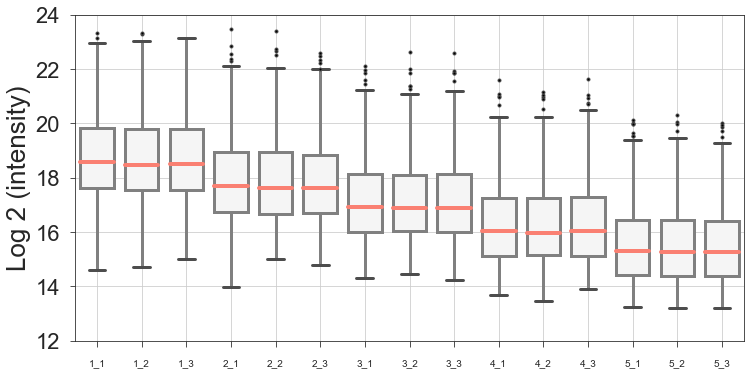

In [48]:
# Plot all common peptides after take log2

matplotlib.rcParams['font.family'] = "Arial"
plt.figure(figsize=(12, 6))
sns.set_style("ticks")
sns.boxplot(data=df_pro2, orient='v',color="grey", boxprops=dict(facecolor="whitesmoke",edgecolor='grey',linewidth=3), 
            whiskerprops=dict(color="grey",linewidth=3), medianprops=dict(color="salmon",linewidth=4), width=0.75,fliersize=6,
           flierprops=dict(markerfacecolor="black", marker="."),linewidth=3)
#plt.rc('xtick', labelsize=12, fontfamily='Arial')
#plt.rc('ytick', labelsize=12, fontfamily='Arial')
plt.ylabel('Log 2 (intensity)',fontsize=26)
plt.tick_params(axis='x', which='major', pad=12,length=6)
plt.tick_params(axis='y', which='major', pad=10,length=5)
plt.xticks(fontsize=10)
#plt.xticks([])
plt.yticks(fontsize=22)
plt.ylim(12,24)
plt.grid()
plt.savefig('D:\\project7_SMAD\\figure2\\quantification assessment\\all_common_pro_log2.svg', dpi=800,bbox_inches = 'tight')
plt.show()